In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## 1. Gray-Scale Images (Single Channel)

- A gray scale image of size Height x Width is an array(matrix) of size Height x Width
- Let's call this array A. Then $A[i,j]$ is a value between **0 (Black) and 255 (White)**

In [2]:
#If I have 4x4 gray-scale image, it looks like as follows.
# Each entry holds a "scalar"
A = np.random.randint(0,255,size=(4,4))
A

array([[ 97,  50, 136, 158],
       [242, 176, 119, 215],
       [ 17, 221, 146, 161],
       [244,  65, 112,  64]])

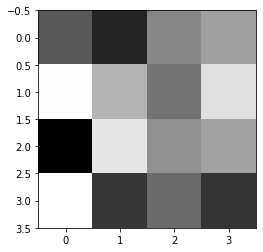

In [3]:
plt.imshow(A,cmap='gray')
plt.show()

In [4]:
print(A[2,0]) 
print(A[3,3]) 

17
64


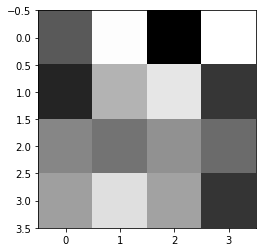

In [5]:
#switch rows and cols
At = A.transpose()
plt.imshow(At,cmap='gray')
plt.show()

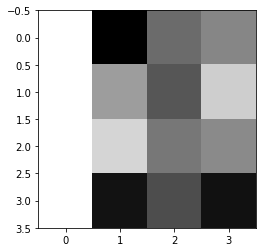

In [6]:
#Here is some trick
A[:,0] = 255; # all rows and first coloumns
A
plt.imshow(A,cmap='gray')
plt.show()

In [7]:
A_flat =  A.flatten()
print(A)
print(A_flat)

[[255  50 136 158]
 [255 176 119 215]
 [255 221 146 161]
 [255  65 112  64]]
[255  50 136 158 255 176 119 215 255 221 146 161 255  65 112  64]


In [8]:
A_flat.size

16

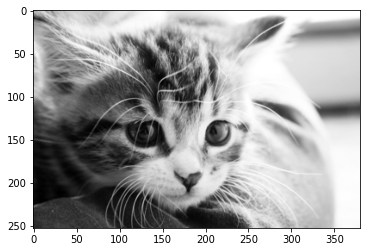

In [9]:
img = np.array(Image.open('figures/kitten.png'))
plt.imshow(img,cmap='gray')
plt.show()

In [10]:
print('height X width: ',img.shape)

height X width:  (253, 380)


In [11]:
#notice the black and white spots
print(img)

[[163 169 169 ... 255 255 255]
 [179 184 176 ... 255 255 255]
 [169 184 195 ... 255 255 255]
 ...
 [ 44  46  47 ... 248 248 248]
 [ 44  45  47 ... 248 247 247]
 [ 37  41  42 ... 249 247 247]]


In [12]:
#pixel value at [150,140], close to left eye.
print(img[150,140])

20


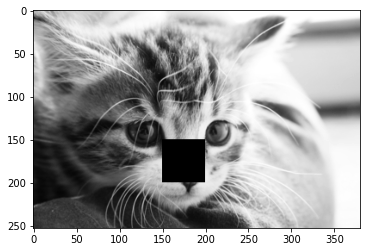

In [13]:
#what will happen?
imgnew = img.copy()
imgnew[150:200,150:200] = 0 # all pixels in these intervals...
plt.imshow(imgnew,cmap='gray')
plt.show()

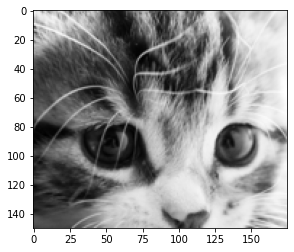

In [14]:
#trim the image
img2 = img[50:200,75:250]
plt.imshow(img2,cmap='gray')
plt.show()

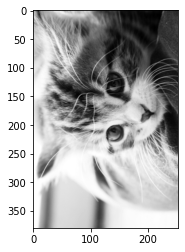

In [15]:
#what will happen?
imgnew = img.transpose()
plt.imshow(imgnew,cmap='gray')
plt.show()

## 2. RGB Images 

In [16]:
#If I have 4x4 rgb image, it looks like
# read it like we have 4x4 matrix and we hold an array of size-3 in each entry
#A[0,0]--first row in the line a=nd etc
A = np.random.randint(0,255,size=(4,4,3))
A

array([[[217, 167,  48],
        [173,  21, 245],
        [ 45,  64, 243],
        [ 68, 171, 207]],

       [[ 68,  59,  91],
        [ 60,  99,  55],
        [211, 176, 123],
        [253, 103,  47]],

       [[ 40,  51, 137],
        [102, 206,  37],
        [ 41, 216,  55],
        [191, 205, 118]],

       [[131, 121,  92],
        [175, 127,  41],
        [172, 230, 112],
        [ 57,   1, 135]]])

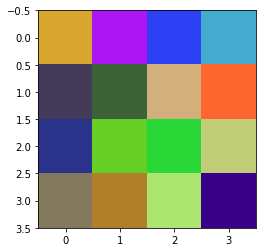

In [17]:
plt.imshow(A)
plt.show()

In [18]:
# R-G-B
print(A[1,0]) 

[68 59 91]


In [19]:
# This system means we actually have around 16M colours...
256*256*256

16777216

In [20]:
print(A[3,2,0]) #red
print(A[3,2,1]) #green
print(A[3,2,2]) #blue

172
230
112


In [21]:
print(A[:,:,0]) #red channel
print('=================')
print(A[:,:,1]) #blue channel
print('=================')
print(A[:,:,2]) #green channel

[[217 173  45  68]
 [ 68  60 211 253]
 [ 40 102  41 191]
 [131 175 172  57]]
[[167  21  64 171]
 [ 59  99 176 103]
 [ 51 206 216 205]
 [121 127 230   1]]
[[ 48 245 243 207]
 [ 91  55 123  47]
 [137  37  55 118]
 [ 92  41 112 135]]


In [22]:
(A.flatten()).size

48

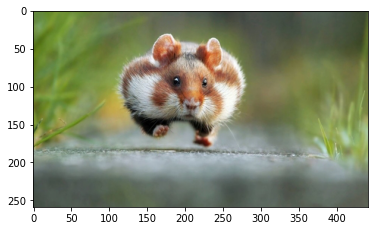

In [23]:
imgRGB = np.array(Image.open('figures/hams.jpg'))
plt.imshow(imgRGB)
plt.show()

In [24]:
print('height X width X channel: ',imgRGB.shape)

height X width X channel:  (259, 442, 3)


In [25]:
print('Left-upper corner: ',imgRGB[0,0])    # must be more green here..
print('Center-ish: ',imgRGB[100,200]) # more red

Left-upper corner:  [101 130  63]
Center-ish:  [135  84  67]


In [26]:
print(imgRGB[100,200,0]) #red 
print(imgRGB[100,200,1]) #green
print(imgRGB[100,200,2]) #blue

135
84
67


In [27]:
#using the same idea we can return channels seperately
temp_red = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_red[:,:,0] = imgRGB[:,:,0]

temp_green = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_green[:,:,1] = imgRGB[:,:,1]

temp_blue = np.zeros(imgRGB.shape,dtype = np.uint8)
temp_blue[:,:,2] = imgRGB[:,:,2]

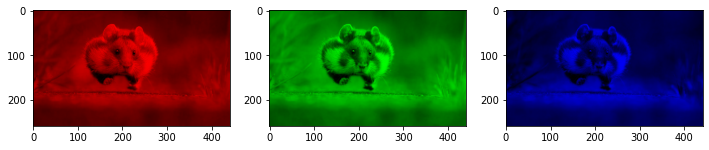

In [28]:
fig,ax =  plt.subplots(1,3,figsize=(12,5))
ax[0].imshow(temp_red)
ax[1].imshow(temp_green)
ax[2].imshow(temp_blue)
plt.show()

## 3. Convolution Operation

We use this to extract contextual information from an image

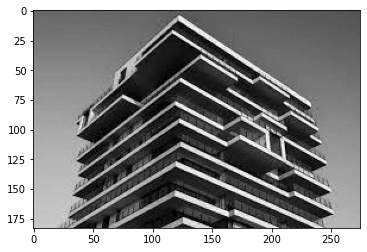

In [29]:
building = np.array(Image.open('figures/building.png').convert('L'))
plt.imshow(building,cmap='gray')
plt.show()

In [30]:
# this kernel detects the edges, 
A = np.array([[1,0,-1],
              [0,0,0],
              [1,0,-1]],dtype=np.int8)
print(A)

[[ 1  0 -1]
 [ 0  0  0]
 [ 1  0 -1]]


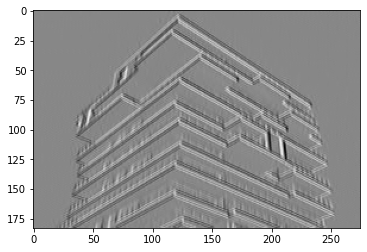

In [31]:
B = signal.convolve2d(building,A,boundary='symm', mode='same')
plt.imshow(B,cmap='gray')
plt.show()

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


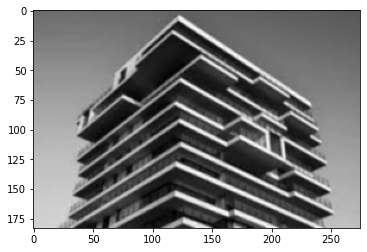

In [32]:
#this blurs it little bit
A = np.array([[0.0625, 0.125, 0.0625],
              [0.125, 0.25, 0.125],
              [0.0625, 0.125, 0.0625]
             ])
print(A)
B = signal.convolve2d(building,A,boundary='symm', mode='same')
plt.imshow(B,cmap='gray')
plt.show()

A1 =  [[-2.31141252 -1.78951882 -0.04971386]
 [ 1.02122869 -1.41394727  0.28260289]
 [-0.91981348 -0.98515699  0.80169179]]

A2 =  [[ 1.02646834 -1.00084192  1.67119535]
 [-1.25550065  0.80105957 -0.04513889]
 [-0.39082177 -1.23626731  0.72069186]]

A3 =  [[ 0.39648118 -0.58058213 -0.16579657]
 [-0.17516233 -0.05428588 -1.28408552]
 [ 0.2168672  -0.73490963  1.43907065]]


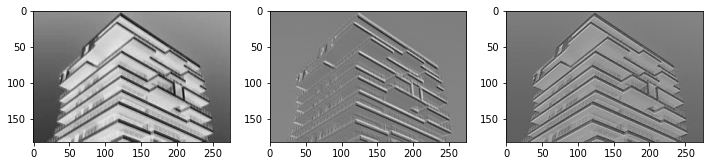

In [33]:
# In fact any convolution operation does SOMETHING!

fig,ax =  plt.subplots(1,3,figsize=(12,5))

A1 = np.random.randn(3,3)
print('A1 = ',A1)
B1 = signal.convolve2d(building,A1,boundary='symm', mode='same')
ax[0].imshow(B1,cmap='gray')

A2 = np.random.randn(3,3)
print('\nA2 = ',A2)
B2 = signal.convolve2d(building,A2,boundary='symm', mode='same')
ax[1].imshow(B2, cmap='gray')

A3 = np.random.randn(3,3)
print('\nA3 = ',A3)
B3 = signal.convolve2d(building,A3,boundary='symm', mode='same')
ax[2].imshow(B3, cmap='gray')
plt.show()
